# 今日作業

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息

舉例來說：

計算任意欄位的平均數及標準差

畫出任意欄位的直方圖

若需要用 pandas 計算統計量或畫圖，可參考以下連結

[Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)

[pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)

畫圖沒靈感時可至以下兩個套件的範例網頁逛逛

[matplotlib](https://matplotlib.org/gallery/index.html)

[seaborn](https://seaborn.pydata.org/examples/index.html)

In [74]:
import os
import numpy as np   # 引用套件並縮寫為 np
import pandas as pd  # 引用套件並縮寫為 pd
import matplotlib.pyplot as plt

In [4]:
# 設定 data_path, 並讀取 app_train
dir_data = './Data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
df = pd.DataFrame(app_train) 
df.head() #看資料前五列

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


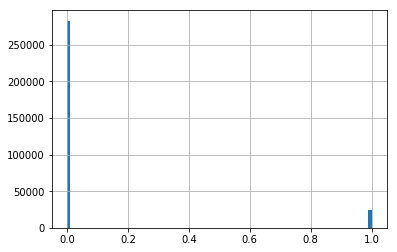

In [22]:
#看目標變數數量,by直方圖
df['TARGET'].hist(bins=100) 

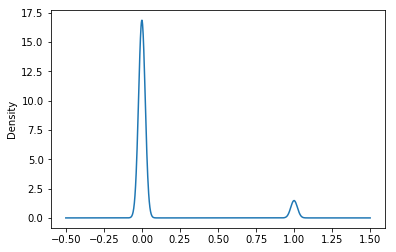

In [23]:
#密度函數圖也稱kde
df['TARGET'].plot(kind='kde') 

In [56]:
df['AMT_INCOME_TOTAL'].describe() #Summary statistics

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [57]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].count() #計算非 NA的值有幾個

265992

In [55]:
print(df.shape) #原本共有307,511 rows 

(307511, 122)


In [58]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].skew() #偏態係數



14.534062061826708

In [59]:
df['AMT_REQ_CREDIT_BUREAU_HOUR'].kurt() #峰態係數


254.24361965653006

In [65]:
Names = ['TARGET','AMT_INCOME_TOTAL','AMT_ANNUITY']
sub_train = pd.DataFrame(app_train[Names]) #subset~
sub_train.corr() #相關係數矩陣

,TARGET,AMT_INCOME_TOTAL,AMT_ANNUITY
TARGET,1.000000,-0.003982,-0.012817
AMT_INCOME_TOTAL,-0.003982,1.000000,0.191657
AMT_ANNUITY,-0.012817,0.191657,1.000000


In [66]:
sub_train.cov() #共變異數矩陣

,TARGET,AMT_INCOME_TOTAL,AMT_ANNUITY
TARGET,0.074212,-2.572156e+02,-5.060535e+01
AMT_INCOME_TOTAL,-257.215642,5.622739e+10,6.587001e+08
AMT_ANNUITY,-50.605354,6.587001e+08,2.100684e+08


Text(0.5,1,'Changes in DAYS_LAST_PHONE_CHANGE vs. CNT_FAM_MEMBERS')

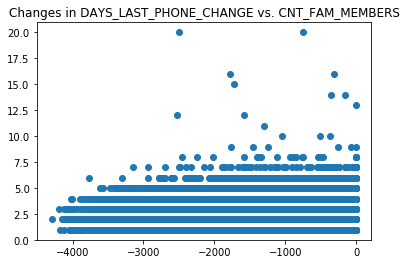

In [82]:
data = app_train[['TARGET', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'DAYS_LAST_PHONE_CHANGE']] #只取部分columns
plt.scatter(data['DAYS_LAST_PHONE_CHANGE'], data['CNT_FAM_MEMBERS']) #散佈圖
plt.title('Changes in %s vs. %s' % ('DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS'))    #加上圖的標題
#第一個 %s 放的是後面 %括號第一個變數,依此類推

In [98]:
from pandas.plotting.scatter_matrix import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(6, 6), diagonal='kde')   


ModuleNotFoundError: No module named 'pandas.plotting.scatter_matrix'

In [ ]:
trans_data = np.log(data).diff().dropna()
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))    # 见下图1

from pandas.tools.plotting import scatter_matrix
scatter_matrix(trans_data, alpha=0.2, figsize=(6, 6), diagonal='kde')    # 见下图2


TARGET
CNT_FAM_MEMBERS
EXT_SOURCE_1
DAYS_LAST_PHONE_CHANGE

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CE8B6B3C18>,
      dtype=object)

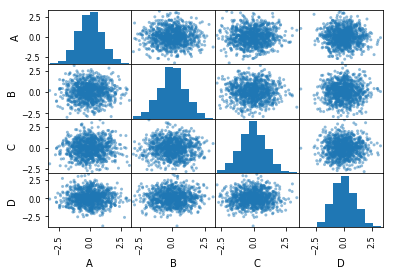

In [100]:
import warnings
warnings.filterwarnings("ignore") #暫且忽略警告的出現

dfff = pd.DataFrame(np.random.randn(1000, 4), columns=['A','B','C','D'])
scatter_matrix(dfff, alpha=0.5)
